# 👁️ Drowsiness Detection using Deep Learning 🧠

## 📚 Table of Contents
- [Project Overview](#project-overview)
- [Dataset Description](#dataset-description)
- [Implementation Details](#implementation-details)
  - [Data Preprocessing](#data-preprocessing)
  - [Model Architecture](#model-architecture)
  - [Training and Evaluation](#training-and-evaluation)
  - [Results Visualization](#results-visualization)

---

## 🎯 Project Overview
Drowsy driving is a major cause of road accidents, making **drowsiness detection** a crucial real-world application.  
This project leverages **Deep Learning (CNN + VGG16)** to classify **whether a person's eyes are open or closed**, providing a foundation for real-time alert systems.

**🔹 Key Highlights:**
- 🖼️ **Image-based classification**: Detects eye openness from images.
- ⚡ **Hybrid Model**: Combines **Custom CNN** & **Pretrained VGG16** for robust feature extraction.
- 🎯 **Real-time applicability**: Can be extended for real-time detection in embedded systems.

---

## 📊 Dataset Description
The **Drowsiness Detection Dataset** used which is a curated combination of multiple open-source datasets:

1. **MRL Dataset**
2. **Closed Eyes in the Wild (CEW) Dataset**
3. **Custom Dataset** (additional images for better generalization)

### 🔹 **Key Features:**
- 🖼️ **Diverse Capture Conditions**:
  - 📸 Different lighting setups
  - 📏 Varying distances & resolutions
  - 🔄 Various face & eye angles  
- ⚖️ **Balanced Class Distribution** (Open Eyes vs. Closed Eyes)
- 📦 **Dataset Variants**:
  - **V1:** 10,000 images
  - **V2:** 5,000 images
  - **V3:** 10,000 images
  - **V4:** 4,000 images

---

## ⚙️ Implementation Details
### 🏗️ **1. Data Preprocessing**
- Image resizing to **224x224 pixels** 📏  
- Data augmentation for improved generalization ✨  
- Train-test split (**80% training, 20% testing**) 📊  

### 🏛️ **2. Model Architecture**
- **Custom CNN Model:** Feature extraction from images  
- **Pretrained VGG16:** Transfer learning for better accuracy  
- **Fully Connected Layers:** Combines extracted features for final classification  

### 🎯 **3. Training and Evaluation**
- **Optimizer:** Adam (Adaptive Learning Rate) ⚡  
- **Loss Function:** Categorical Crossentropy 🎯  
- **Metric:** Accuracy (%) 📈  
- **Best Model Checkpointing** for saving optimal performance weights 💾  

### 📊 **4. Results Visualization**
- **Confusion Matrix** for classification analysis 🔍  
- **Training Curves (Loss & Accuracy)** 📉📈  
- **Misclassified Images Display** for debugging 🧐  

---

🔥 **Next Step:** Proceed with **Cell-1: Importing Libraries & Setup** 🚀  


# 📌 **Step 1: Importing Required Libraries & Defining Paths**
# ---------------------------------------------------------------
### This cell imports the necessary libraries required for:
- ✅ Deep Learning: TensorFlow & Keras
- ✅ Data Handling: NumPy & OS
- ✅ Dataset Splitting: Sklearn (Train-Test Split)
### It also defines the dataset directory and standard parameters like:
- 🖼️ Image dimensions (224x224 pixels)
- 📦 Batch size for training (32)
### 🔹 The dataset directory should be updated to the correct path before running this cell.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Load and preprocess dataset
dataset_dir = "/kaggle/input/mrl-dataset/train"  # Replace with the path to your dataset
img_height, img_width = 224, 224  
batch_size = 32

# 📊 **Step 2: Loading & Preprocessing the Dataset**

## In this cell, we:

### 🔹 **Use ImageDataGenerator for Data Augmentation:**  
- This allows us to rescale pixel values to the range `[0, 1]`, which accelerates model convergence.  
- No additional augmentations (like rotation or flipping) are applied to keep the dataset consistent.  

### 🔹 **Load Images and Labels:**  
- `flow_from_directory()` loads images directly from the directory structure.  
- Subfolder names are automatically treated as class labels.  
- `shuffle=False` ensures that the order of images is preserved, useful for consistent train-test splits.  

### 🔹 **Convert Data to NumPy Arrays:**  
- Images (`x_data`) and labels (`y_data`) are stored in lists and then concatenated into NumPy arrays for faster computation.  

### 🔹 **Split Data into Training and Testing Sets:**  
- `train_test_split()` is used to split the data into **80% training** and **20% testing**.  
- The `random_state` is fixed for reproducibility.  

### 📌 **Why This Step Matters:**  
Proper data preprocessing and consistent splitting are essential for building a reliable and generalizable model.

In [2]:
# Define ImageDataGenerator for loading images and labels
datagen = ImageDataGenerator(rescale=1.0/255)

# Load the images from the directory without splitting
data_flow = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Make sure data is not shuffled for consistent splits
)

# Store images (x) and labels (y)
x_data, y_data = [], []

# Load all the data
for i in range(len(data_flow)):
    x_batch, y_batch = data_flow[i]
    x_data.append(x_batch)
    y_data.append(y_batch)

# Convert to numpy arrays
x_data = np.concatenate(x_data, axis=0)
y_data = np.concatenate(y_data, axis=0)

# Split data into train and test (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

Found 4000 images belonging to 2 classes.
x_train shape: (3200, 224, 224, 3), y_train shape: (3200, 2)
x_test shape: (800, 224, 224, 3), y_test shape: (800, 2)


# 🧠 **Step 3: Building a Hybrid Model (Simple CNN + VGG16)**
# ---------------------------------------------------------------
### This cell builds a deep learning model that combines:
- ✅ A **Custom CNN Model** (Extracts features from raw images)
- ✅ A **Pretrained VGG16 Model** (Extracts additional feature representations)
- ✅ A **Fully Connected Layer** (Combines features for classification)

### 🔹 The Simple CNN has:
-    🔸 Multiple Conv2D layers with different activation functions (ReLU, Softplus, Tanh, ELU)
-    🔸 MaxPooling for feature downsampling
-    🔸 Global Average Pooling for feature reduction

### 🔹 VGG16:
-    🔸 Pretrained on ImageNet dataset
-    🔸 Frozen layers (not trainable) to preserve learned features

### 🔹 The final model concatenates both networks and adds:
-    🔸 A Dense layer (256 neurons, ReLU activation)
-    🔸 A Dropout layer (50% dropout to prevent overfitting)
-    🔸 An Output layer with softmax activation (for multi-class classification)

🔹 **Why This Architecture?**  
- Combining custom layers with a pre-trained model harnesses the power of transfer learning while maintaining flexibility for domain-specific features.  
- This hybrid approach is especially powerful when dealing with limited data or complex image categories.  

🔔 **Tip:** This model architecture is flexible—feel free to experiment with different activation functions or layer configurations.


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Simple CNN (Model 1)
def create_simple_cnn(input_shape):
    cnn_input = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation="relu")(cnn_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="softplus")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation="tanh")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation="elu")(x)
    x = layers.GlobalAveragePooling2D()(x)
    return Model(inputs=cnn_input, outputs=x, name="SimpleCNN")

simple_cnn = create_simple_cnn(input_shape)

# VGG16 (Model 2) for feature extraction
vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16_base.trainable = False  # Freeze VGG16 layers

# Input layer
input_layer = Input(shape=input_shape)

# Extract features from Simple CNN
simple_cnn_features = simple_cnn(input_layer)

# Extract features from VGG16
vgg16_features = vgg16_base(input_layer)
vgg16_features = layers.GlobalAveragePooling2D()(vgg16_features)

# Concatenate features
concatenated_features = layers.concatenate([simple_cnn_features, vgg16_features])

# Add fully connected layers for classification
x = layers.Dense(256, activation="relu")(concatenated_features)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(data_flow.num_classes, activation="softmax")(x)

# Final model
combined_model = Model(inputs=input_layer, outputs=output_layer)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# ⚙️ Step 4: Compiling the Combined Model

## Here we:

### 🔹 **Choose the Optimizer:**  
- `Adam` optimizer is used for efficient training with adaptive learning rates.  
- Adam is popular for its robustness and fast convergence.  

### 🔹 **Specify the Loss Function:**  
- `Categorical Crossentropy` is ideal for multi-class classification tasks.  
- It measures the divergence between the predicted and true class probabilities.  

### 🔹 **Set Evaluation Metrics:**  
- `Accuracy` is tracked as the primary performance metric.  

### 🔹 **Summary of the Model:**  
- `summary()` provides a layer-by-layer overview of the model architecture, including:  
  - Layer names and types.  
  - Output shapes.  
  - Number of trainable and non-trainable parameters.  

### 📌 **Why Compilation Matters:**  
Compiling defines how the model learns (optimizer), how the loss is calculated (loss function), and what metrics to monitor during training.


In [4]:
# Compile the model
combined_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary of the model
combined_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ SimpleCNN (Functional)    │ (None, 256)            │        388,416 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 768)            │              0 │ SimpleCNN[0][0],       │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        196,864 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 2)              │            514 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,300,482 (58.37 MB)

 Trainable params: 585,794 (2.23 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# 🖼️ **Step 5: Visualizing the Model Architecture**
# ---------------------------------------------------------------
- ✅ Uses `plot_model()` to generate a visual representation of the model.
- ✅ Displays:\
      🔹 Layer Names\
      🔹 Input & Output Shapes\
      🔹 Connections between different layers

 📌 **Helps in understanding the structure of the deep learning model before training.**


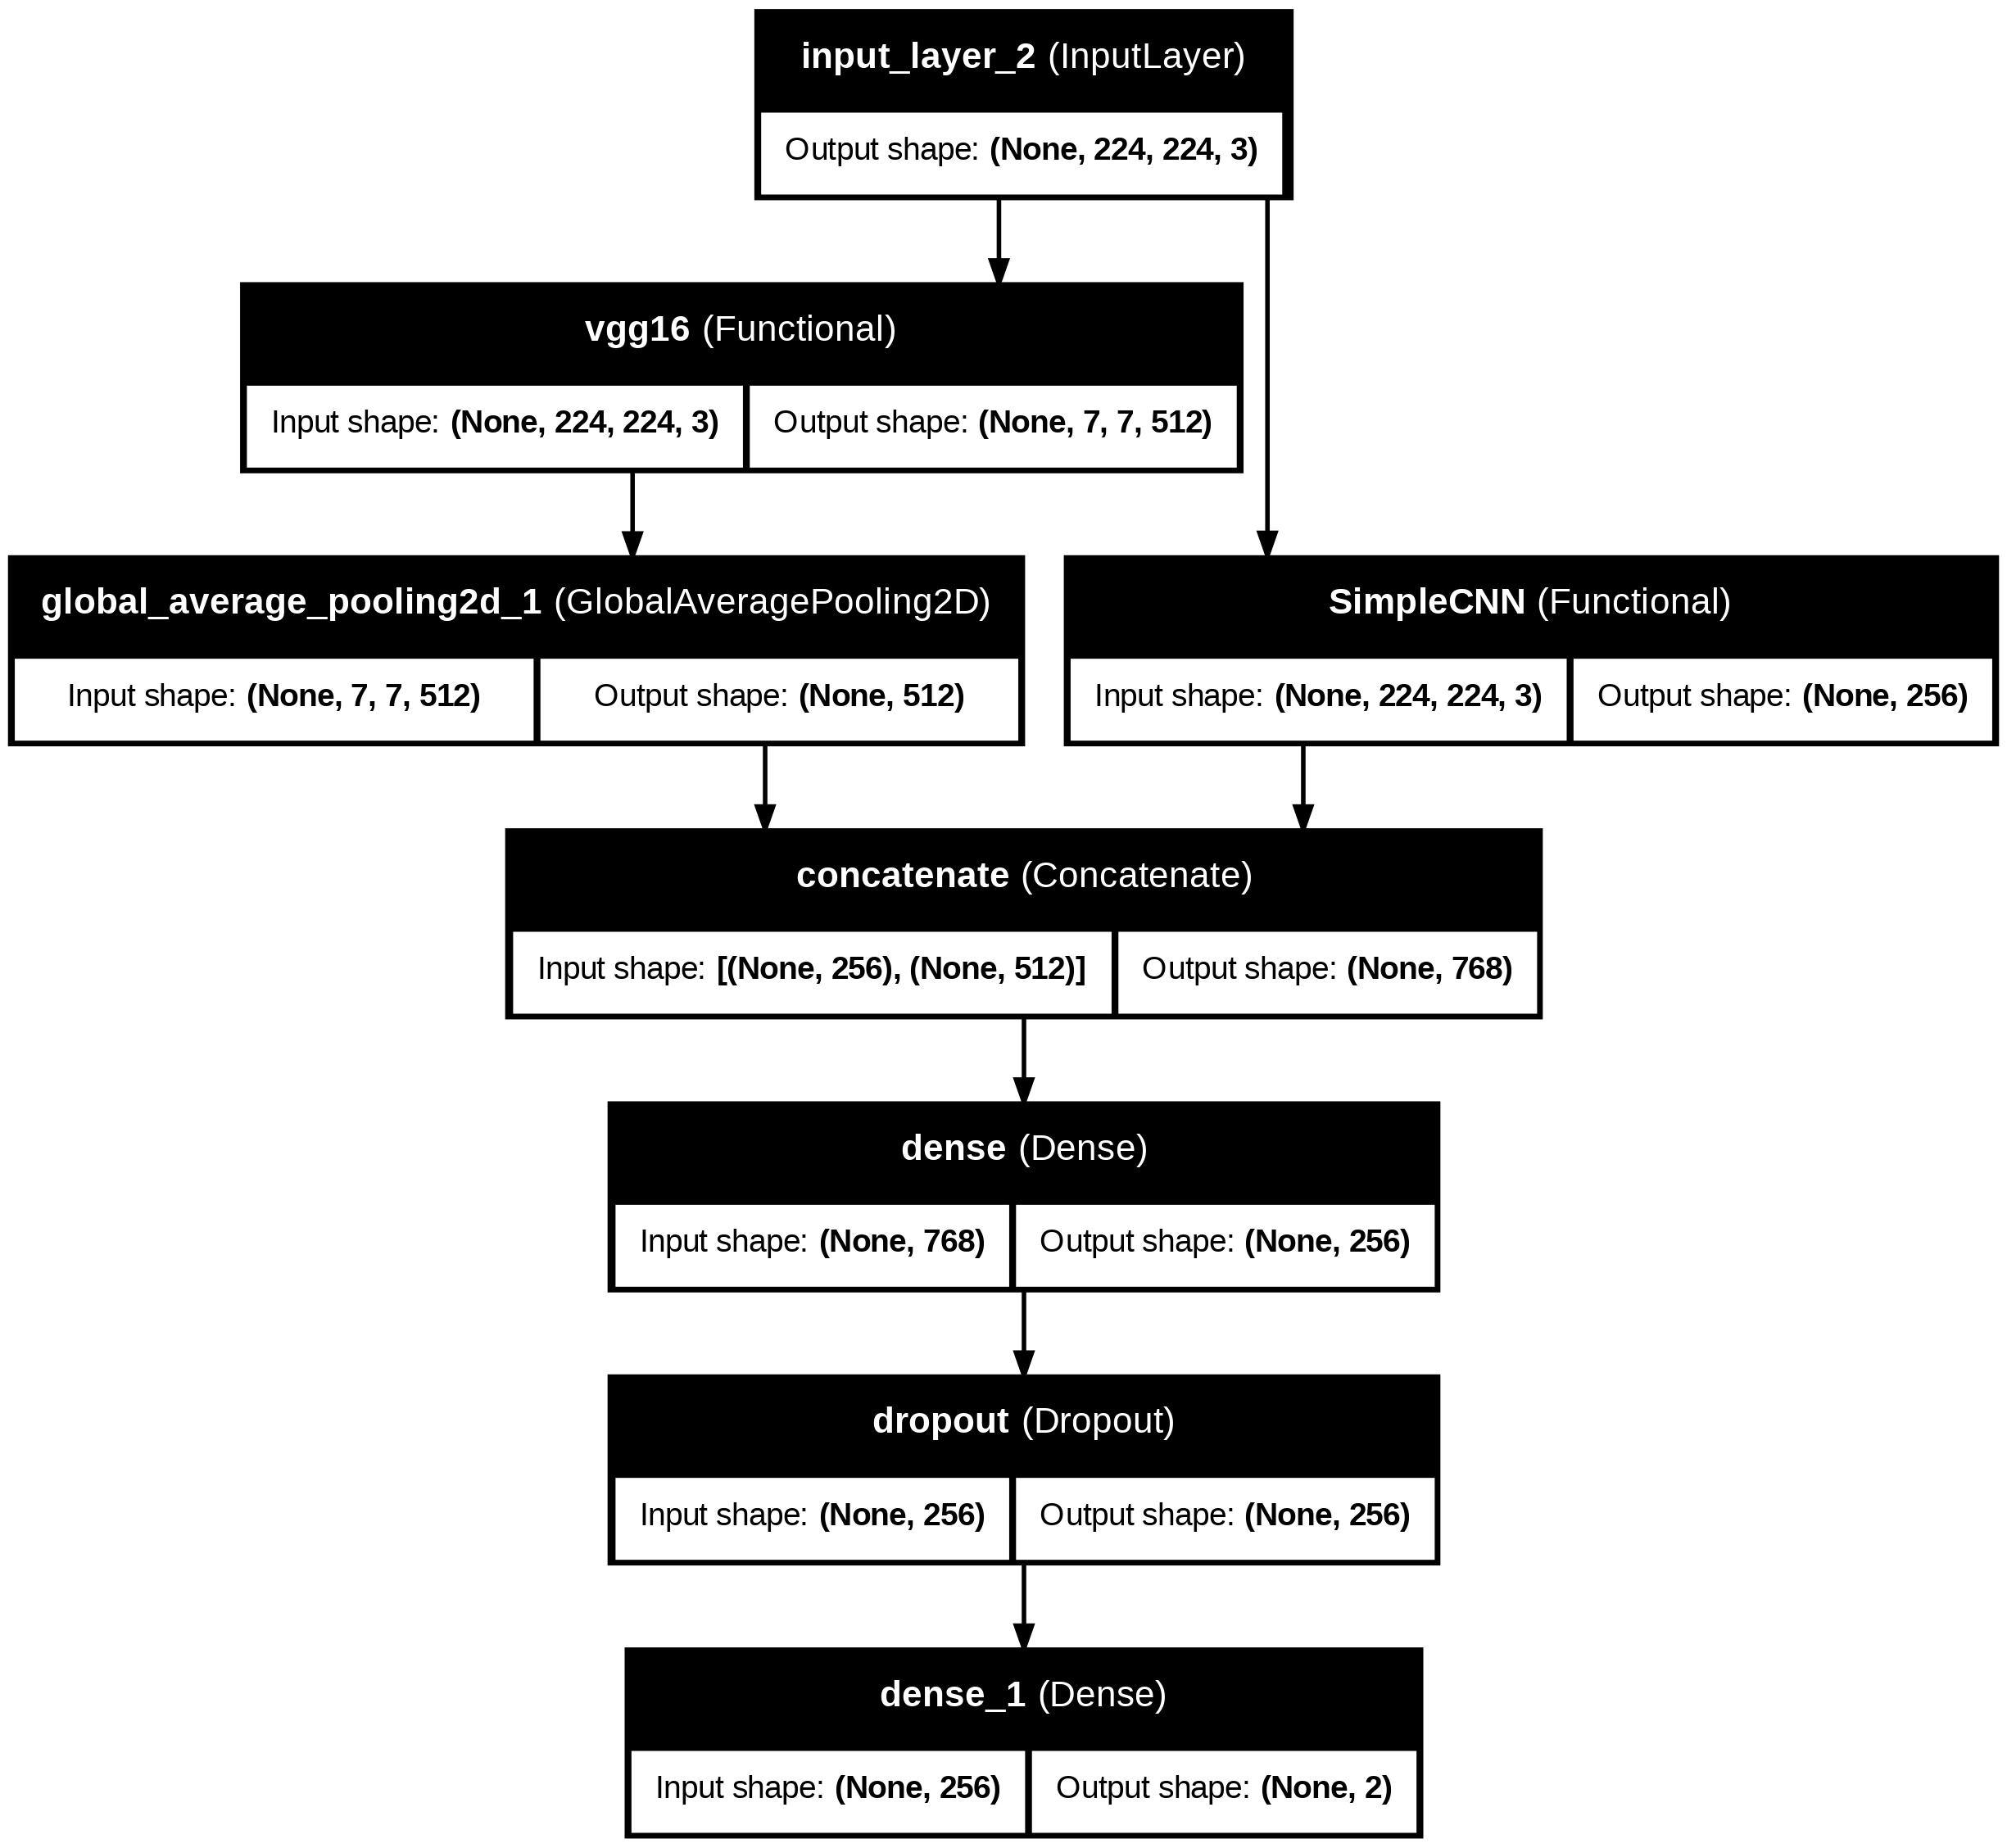

In [5]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(combined_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 🚀 Step 6: Training the Model with Checkpoints

In this step:

🔹 **Define a ModelCheckpoint Callback:**  
- Monitors `val_accuracy` to save only the best-performing model.  
- `save_best_only=True` prevents overwriting the best model during training.  

🔹 **Train the Model:**  
- The model is trained for `50 epochs` using the training data (`x_train` and `y_train`).  
- `validation_data` is used to monitor generalization performance.  
- Training time is recorded for performance analysis.  

🔹 **Why Use Callbacks?**  
- To **save time and resources** by storing only the most accurate model.  
- To **resume training** from checkpoints if interrupted.  

🧪 **Experimentation:** Try adjusting the learning rate, batch size, or number of epochs to improve accuracy and reduce overfitting.

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "best_combined_model3.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 50
history = combined_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5287 - loss: 0.8096
Epoch 1: val_accuracy improved from -inf to 0.70125, saving model to best_combined_model3.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 238ms/step - accuracy: 0.5293 - loss: 0.8084 - val_accuracy: 0.7013 - val_loss: 0.5731
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7291 - loss: 0.4858
Epoch 2: val_accuracy improved from 0.70125 to 0.76750, saving model to best_combined_model3.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.7294 - loss: 0.4854 - val_accuracy: 0.7675 - val_loss: 0.4578
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8143 - loss: 0.3795
Epoch 3: val_accuracy improved from 0.76750 to 0.85250, saving model to best_combined_model3.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.8142 - loss: 0.3796 - val_accuracy: 0.8525 - val_loss: 0.3324
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8447 - loss: 0

# ⏲️ Step 7: Analyzing Training Duration

Here we:

🔹 **Calculate Total Training Time:**  
- Display the time taken to train the model using `time.time()`.

🔹 **Why Record Training Time?**  
- Useful for benchmarking model performance.  
- Helps in optimizing resource allocation for future experiments.  

⏱️ **Insight:** If training time is too long, consider optimizing the model by reducing the number of layers, using smaller images, or using a more efficient optimizer.

In [7]:
print(f"Total training time: {training_time:.2f} seconds")

Total training time: 1218.61 seconds


# 🏁 **Step 8: Evaluating the Model on Train & Test Data**
# ---------------------------------------------------------------
- ✅ Load the **best saved model**.
- ✅ Evaluates it on:\
    🔹 Training Dataset\
    🔹 Testing Dataset
- ✅ Prints:\
    🔹 Train & Test Loss\
    🔹 Train & Test Accuracy

### 📌 **This helps in understanding model performance and overfitting tendencies.**


In [8]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("best_combined_model3.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.9955 - loss: 0.0304
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9974 - loss: 0.0256
Test Loss: 0.0292, Test Accuracy: 0.9962
Train Loss: 0.0299, Train Accuracy: 0.9950


# 🔍 **Step 9: Analyzing Model Performance using Confusion Matrix**
# ---------------------------------------------------------------
- ✅ Generates predictions on the test dataset.
- ✅ Computes a **Confusion Matrix** to visualize:\
    🔹 Correct & Incorrect Predictions\
    🔹 Class-wise accuracy
- ✅ Uses **Seaborn Heatmap** for better visualization.
- ✅ Computes:\
    🔹 Precision, Recall, and F1-Score

### 📌 **Confusion Matrix helps in identifying misclassified samples.**


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step


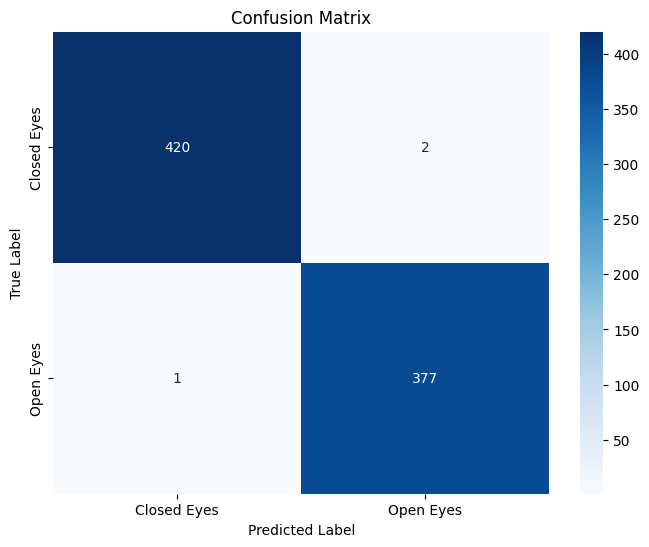

Classification Report:
               precision    recall  f1-score   support

 Closed Eyes       1.00      1.00      1.00       422
   Open Eyes       0.99      1.00      1.00       378

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Precision: 0.9947
Recall: 0.9974
F1 Score: 0.9960


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is one-hot encoded, so we convert it to class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels (for drowsiness detection: 0 = Closed Eyes, 1 = Open Eyes)
class_labels = ['Closed Eyes', 'Open Eyes']

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Compute Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Optionally, compute Precision, Recall, and F1-Score individually
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 📉 **Step 10: Evaluating Model Performance with ROC-AUC Curve**
# ---------------------------------------------------------------
- ✅ Computes **ROC-AUC Score** to measure classification effectiveness.
- ✅ Plots **True Positive Rate (TPR) vs. False Positive Rate (FPR)**.
- ✅ Helps in understanding the model's ability to separate different classes.

### 📌 **A higher AUC score indicates better classification performance.**


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step
ROC-AUC Score: 0.9998


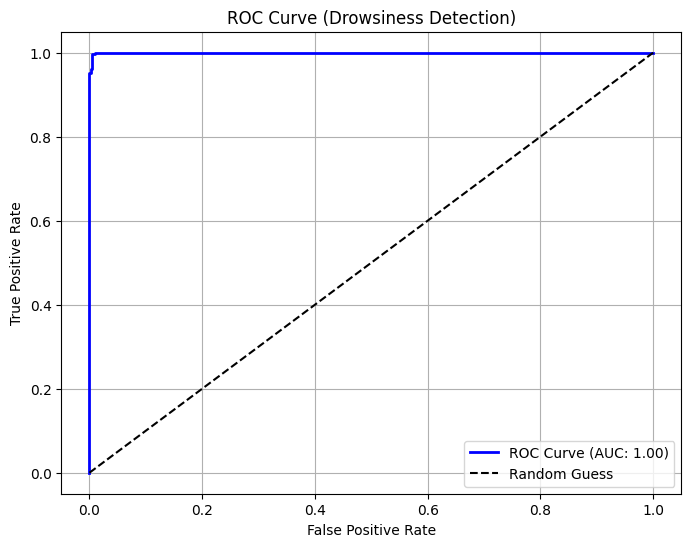


ROC Curve Analysis:
Number of thresholds: 30
FPR range: [0.0000, 1.0000]
TPR range: [0.0000, 1.0000]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities (keeping the probabilities for both classes)
y_pred_prob = best_model.predict(x_test)

# Convert one-hot encoded y_test to class labels if needed
y_true = np.argmax(y_test, axis=1) if y_test.ndim == 2 else y_test

# For binary classification, we'll use the probability of the positive class (class 1)
# Get probabilities for the positive class (Open Eyes - class 1)
y_pred_prob_positive = y_pred_prob[:, 1]

# Now compute ROC-AUC Score
roc_auc = roc_auc_score(y_true, y_pred_prob_positive)

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob_positive)

# Print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC: {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Drowsiness Detection)')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

# Print additional metrics
print("\nROC Curve Analysis:")
print(f"Number of thresholds: {len(thresholds)}")
print(f"FPR range: [{min(fpr):.4f}, {max(fpr):.4f}]")
print(f"TPR range: [{min(tpr):.4f}, {max(tpr):.4f}]")

# 🔥 **Step 11: Identifying & Displaying Misclassified Samples**
# ---------------------------------------------------------------
- ✅ Extracts misclassified images where:\
-    🔹 True label ≠ Predicted label
- ✅ Displays up to **16 misclassified images**.
- ✅ Helps in understanding **failure cases & potential biases** in the model.

### 📌 **Useful for debugging and improving model generalization!**


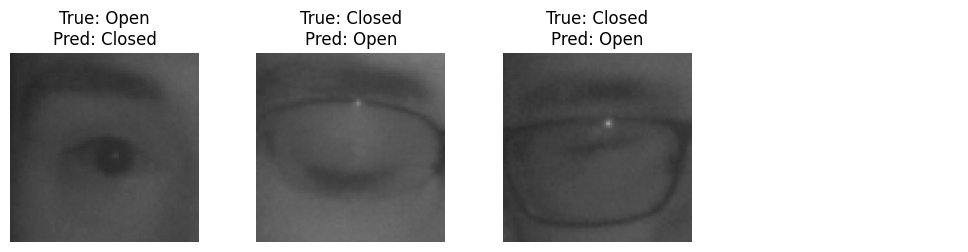

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define class labels (Modify based on your dataset)
class_labels = ["Closed", "Open"]  # Assuming 0 = Closed, 1 = Open

# Find misclassified indices
misclassified_indices = np.where(y_true != y_pred)[0]

# Limit the number of images displayed to avoid overcrowding
num_images = min(len(misclassified_indices), 16)  # Show up to 16 misclassified images
misclassified_indices = misclassified_indices[:num_images]

# Set up grid for visualization
rows = int(np.ceil(num_images / 4))  # Dynamically adjust rows
fig, axes = plt.subplots(rows, 4, figsize=(10, 2.5 * rows))  
axes = axes.ravel()  # Flatten the 2D array for easy indexing

for i, idx in enumerate(misclassified_indices):
    axes[i].imshow(x_test[idx], cmap="gray")  # Use grayscale if needed
    axes[i].axis("off")
    axes[i].set_title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred[idx]]}")

# Hide unused subplots
for i in range(num_images, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# 📉 **Step 12: Visualizing Training & Validation Loss**
# ---------------------------------------------------------------
- ✅ Plots the **Loss Curve** for:\
    🔹 Training Dataset\
    🔹 Validation Dataset
- ✅ Helps in detecting:\
     🔹 Overfitting (if validation loss increases)\
     🔹 Underfitting (if both losses remain high)

### 📌 **A well-trained model should have decreasing loss curves over epochs.**


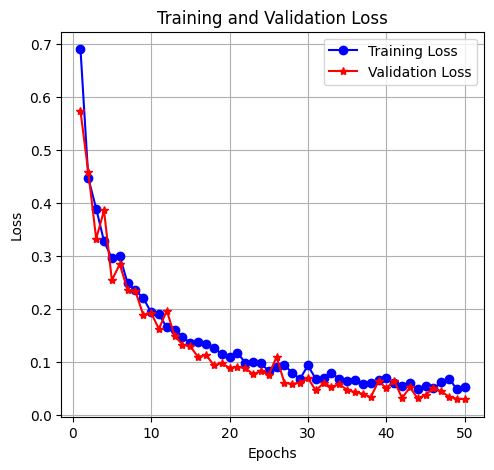

In [17]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()
history_dict = history.history

# Extract data
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' for blue dots
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')  # 'r*-' for red stars
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 📈 **Step 13: Visualizing Training & Validation Accuracy**
# ---------------------------------------------------------------
- ✅ Plots the **Accuracy Curve** for:\
    🔹 Training Dataset\
    🔹 Validation Dataset
- ✅ Ensures that the model is **learning & generalizing well**.

### 📌 **A good model should show increasing accuracy over epochs.**

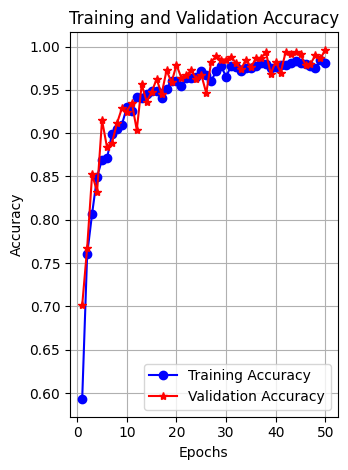

In [18]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
